# EAI6050 2022 Fall B Week 2 Assignment

With the loaded daily portfolio return data, please calculate both the __historical__(Section One) and the __parametric__(Section Two) Value at Risk(VaR) and Conditional Value at Risk(CVaR).

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import norm
from tabulate import tabulate
%matplotlib inline

In [5]:
df = pd.read_csv('eai6050_assignment2.csv')
df.head()

,Date,pf_returns
0,2020-01-03,-0.009394
1,2020-01-06,0.016566
2,2020-01-07,-0.004219
3,2020-01-08,0.011326
4,2020-01-09,0.008879


In [6]:
df = df.set_index(pd.DatetimeIndex(df['Date']))
df.drop(["Date"],inplace = True, axis = 1)

In [7]:
df.head()

,pf_returns
Date,
2020-01-03,-0.009394
2020-01-06,0.016566
2020-01-07,-0.004219
2020-01-08,0.011326
2020-01-09,0.008879


# Section One
## Measuring Risk - Non-Parametric(Historical) Approach

As a portfolio manager, it's important to know what the possible maximum daily loss is. You will use historical daily return information to calculate VaR and CVaR in this section. 

Please round up the results to the __third decimal place__. 

### <div class="alert alert-info">[GRADED  TASK 1.1]</div>
Calculate the daily __VaR__ with 99% confidence interval for the portfolio.
Please comment on the result.

In [8]:
# Your answer here
def historical_VaR(returns,alpha):
    return np.percentile(returns,alpha)
hist_VaR_99 = historical_VaR(df['pf_returns'],1)
print(f"Daily Value at Risk at 99% Confidence Interval : {round(hist_VaR_99,3)}")


Daily Value at Risk at 99% Confidence Interval : -0.059


### <div class="alert alert-info">[GRADED  TASK 1.2]</div>
Calculate the daily __CVaR__ with 99% confidence interval for the portfolio.
Please comment on the result.

Hint: since historical VaR is calculated at the 99% confidence interval, historical CVaR could be calculated as the average of the worst 1% losses.

In [11]:
# Your answer here
def historical_CVaR(returns,alpha):
    belowVaR = returns <= historical_VaR(returns, alpha=alpha)
    return returns[belowVaR].mean()

hist_CVaR_99 = historical_CVaR(df['pf_returns'],1)

print(f"Daily Conditional Value at Risk beyond 99% Confidence Interval : {round(hist_CVaR_99,3)}")

Daily Conditional Value at Risk beyond 99% Confidence Interval : -0.091


In [12]:
InitialInvestment = 100000
print(f'Value at Risk 99th CI    :  {round(InitialInvestment*hist_VaR_99,2)}')
print(f'Conditional VaR 99th CI  :  {round(InitialInvestment*hist_CVaR_99,2)}')

Value at Risk 99th CI    :  -5944.86
Conditional VaR 99th CI  :  -9057.4


### <div class="alert alert-info">[GRADED  TASK 1.3]</div>
Creat a histogram of the return and add VaR & CVaR calculated above to the figure

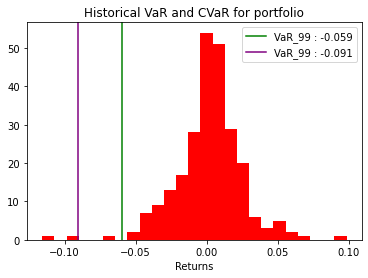

In [18]:
# Your answer here

# Plot for portfolio returns
plt.hist(df['pf_returns'], bins=25, color='red')


plt.axvline(hist_VaR_99, color='green', label = f'VaR_99 : {round(hist_VaR_99,3)}')
plt.axvline(hist_CVaR_99, color = 'purple', label= f'VaR_99 : {round(hist_CVaR_99,3)}')

plt.xlabel('Returns')
plt.title('Historical VaR and CVaR for portfolio')
plt.legend()
plt.show()

# Section Two
## Measuring Risk - Parametric Approach

Assume the portfolio return is normal distributed. 
- Please find the mean and standard deviation from the given daily returns of the portfolio.
- Then use the normal distribution to calculate VaR & CVaR

Please round up the results to the __third decimal place__. 

### <div class="alert alert-info">[GRADED  TASK 2.1]</div>
Calculate the daily __VaR__ with 99% confidence interval  and add comments to the result

In [24]:
# Your answer here
pf_return_mean = np.mean(df['pf_returns'])
pf_return_std = np.std(df['pf_returns'])

def parametric_VaR(return_mean, stddev, alpha):
    return norm.ppf(1-alpha/100)*stddev - return_mean

para_VaR_99 = parametric_VaR(pf_return_mean, pf_return_std,1)
print(f"Daily Value at Risk at 99% Confidence Interval : {round(para_VaR_99,3)}")

Daily Value at Risk at 99% Confidence Interval : 0.053


### <div class="alert alert-info">[GRADED  TASK 2.2]</div>
Calculate the daily __CVaR__ with 99% confidence interval  and add comments to the result

$$CVaR=\frac{1}{1-\alpha}\int_{-\infty}^{VaR(\alpha)} xf(x)\,dx$$

$\alpha$ is the confidence interval

$f(x)$ is the probability density function

In [25]:
def parametric_CVaR(return_mean, stddev, alpha):
    CVaR = (alpha/100)**-1 * norm.pdf(norm.ppf(alpha/100))*stddev - return_mean
    return CVaR

para_CVaR_99 = parametric_CVaR(pf_return_mean, pf_return_std, 1)

print(f"Daily Conditioal Value at Risk at 99% Confidence Interval : {round(para_CVaR_99,3)}")

Daily Conditioal Value at Risk at 99% Confidence Interval : 0.061


In [26]:
InitialInvestment = 100000
print(f'Value at Risk 99th CI    :  {round(InitialInvestment*para_VaR_99,2)}')
print(f'Conditional VaR 99th CI  :  {round(InitialInvestment*para_CVaR_99,2)}')

Value at Risk 99th CI    :  5290.91
Conditional VaR 99th CI  :  6090.6


### <div class="alert alert-info">[GRADED  TASK 2.3]</div>
Creat a histogram of the return and add VaR & CVaR calculated above to the figure

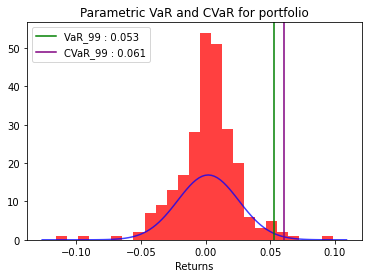

In [30]:
# Plot for portfolio returns
plt.hist(df['pf_returns'], bins=25, color = 'red', alpha=0.75)

# Plot the PDF of portfolio returns
mean, std = norm.fit(df['pf_returns'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, color = 'blue', alpha = 0.75)

# Adding the VaR and CVaR to plot
plt.axvline(para_VaR_99, color='green', label = f'VaR_99 : {round(para_VaR_99,3)}')
plt.axvline(para_CVaR_99, color = 'purple', label= f'CVaR_99 : {round(para_CVaR_99,3)}')

plt.xlabel('Returns')
plt.title('Parametric VaR and CVaR for portfolio')
plt.legend()
plt.show()